In [181]:
import sys
import pandas as pd
import numpy as np
from sklearn import cluster, datasets, linear_model
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection  import train_test_split
import seaborn as sns

In [182]:
data_etudiant=pd.read_csv("data\dataSet_NbrEtudiant_sexe.csv", sep=';')
data_etudiant["Nombre Etudiant Total"]=data_etudiant["Nombre Etudiant Femme"]+data_etudiant["Nombre Etudiant Male"]
data_logement=pd.read_csv("data\\NumberConstructionPerYear.csv", sep=';')

In [183]:
data_etudiant


,rentrée,Nombre Etudiant Femme,Nombre Etudiant Male,Nombre Etudiant Total
0,2001,235604.0,189282.0,424886.0
1,2002,243258.0,193056.0,436314.0
2,2003,253350.0,198248.0,451598.0
3,2004,254930.0,198848.0,453778.0
4,2005,251174.0,197498.0,448672.0
5,2006,243340.0,192589.0,435929.0
6,2007,241098.0,190700.0,431798.0
7,2008,237630.0,188236.0,425866.0
8,2009,242831.0,193006.0,435837.0
9,2010,251084.0,198830.0,449914.0


In [184]:
data_logement

,year,NumberConstructionPeerYear,T1,T2,T3,T4
0,2013,11,50,40,30,20
1,2014,104,40,40,20,14
2,2015,88,60,50,25,23
3,2016,86,70,60,36,40
4,2017,96,75,50,45,37
5,2018,60,78,60,30,28


In [185]:
reg = linear_model.LinearRegression()

features=data_logement[['T1','T2','T3','T4']]
target=data_logement.NumberConstructionPeerYear

reg.fit(features,target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [186]:
data_logement.iloc[:,2]

0    50
1    40
2    60
3    70
4    75
5    78
Name: T1, dtype: int64

In [187]:
reg.coef_[0]*data_logement.T1+reg.coef_[1]*data_logement.T2+reg.coef_[2]*data_logement.T3+reg.coef_[3]*data_logement.T4+reg.intercept_

0     52.544923
1     66.888224
2    102.186071
3     93.599681
4     72.947634
5     56.833466
dtype: float64

In [188]:

res=0
for idx, val in enumerate(reg.coef_):
    result=reg.coef_[idx]*data_logement.iloc[:,idx+2]
    
    res=res+result

res= res+ reg.intercept_
res
#340.642184-641.041220-549.026656+335.123826+reg.intercept_


0     52.544923
1     66.888224
2    102.186071
3     93.599681
4     72.947634
5     56.833466
dtype: float64

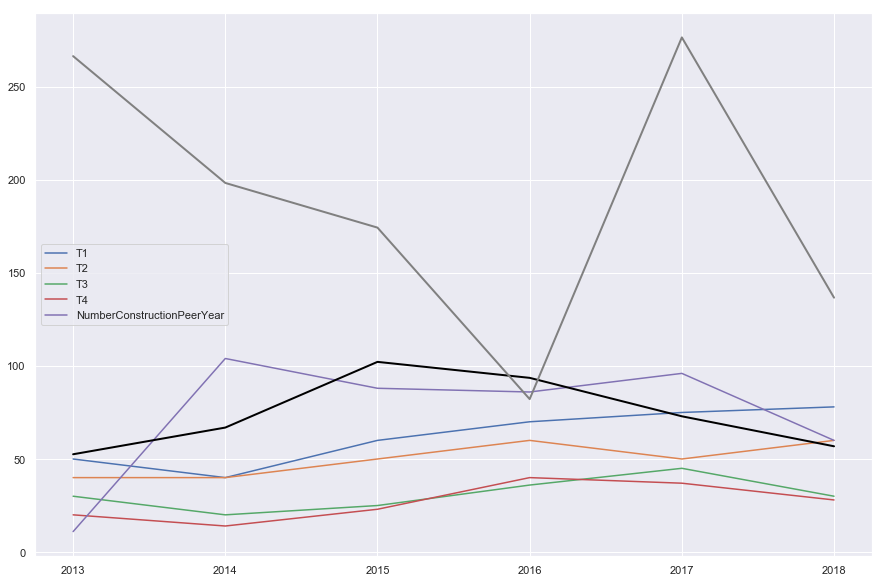

In [200]:

#sns.palplot(sns.light_palette("green"))
sns.set()
sns.color_palette("PuBuGn_d")
plt.plot(data_logement.year,data_logement.T1)
plt.plot(data_logement.year,data_logement.T2)
plt.plot(data_logement.year,data_logement.T3)
plt.plot(data_logement.year,data_logement.T4)
plt.plot(data_logement.year,data_logement.NumberConstructionPeerYear)
plt.plot(data_logement.year,reg.coef_[0]*data_logement.T1+reg.coef_[1]*data_logement.T2+reg.coef_[2]*data_logement.T3
         +reg.coef_[3]*data_logement.T4+reg.intercept_, color="black", linewidth=2)



plt.plot(data_logement.year,reg.coef_[0]*data_logement.T1+reg.coef_[1]*data_logement.T2+reg.intercept_, color="grey", linewidth=2)


plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()

In [190]:
data_logement.columns.size

6

In [191]:
features.iloc[:1,:].values


array([[50, 40, 30, 20]], dtype=int64)

T1
T2
T3
T4


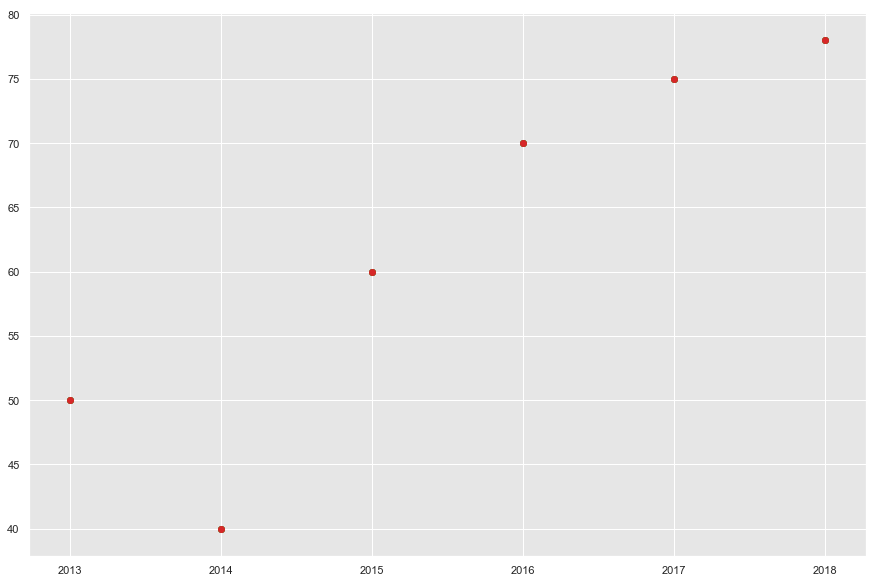

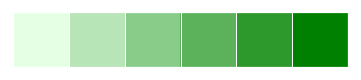

In [194]:
fig, ax = plt.subplots()

for val in features.columns:
    ax.scatter(data_logement.iloc[:,0],features.iloc[:data_logement.size,0])
    print(val)

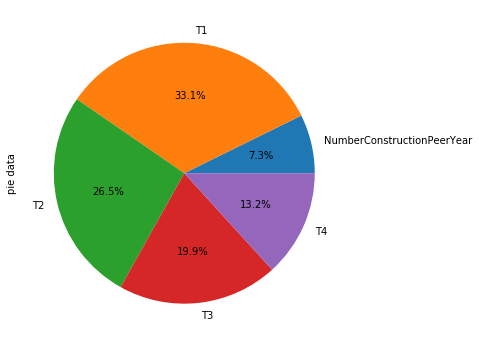

In [123]:

figBars, axBars = plt.subplots()

#ax = data_logement.plot.bar(x=data_logement.columns[0],y=[data_logement.columns[val] for val in range(1,data_logement.columns.size)], rot=0)
data=data_logement



#data.plot(kind='pie',y=data.iloc[:1,1:].values, rot=0,ax=axBars,legend=False)

data_col =[data.columns[val] for val in range(1,data.columns.size)]
series = pd.Series(data.iloc[:1,1:].values[0], 
                   index=data_col, 
                   name='pie data')

series.plot.pie(figsize=(6, 6),autopct='%1.1f%%')

In [139]:
for index, row in data.iterrows():
    print(row[0])
    print(row[1:].values)

2013
[11 50 40 30 20]
2014
[104  40  40  20  14]
2015
[88 60 50 25 23]
2016
[86 70 60 36 40]
2017
[96 75 50 45 37]
2018
[60 78 60 30 28]


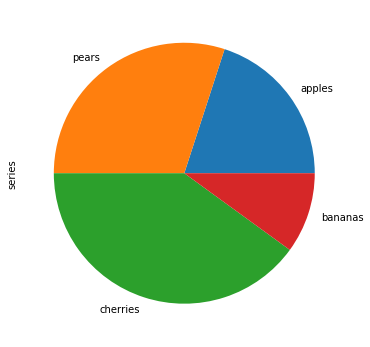

In [145]:
fig1, ax1= plt.subplots()
fruits = ['apples', 'pears', 'cherries', 'bananas']
series = pd.Series([20, 30, 40, 10], 
                   index=fruits, 
                   name='series')
#explode = [0, 0.10, 0.40, 0.7]
series.plot(kind='pie',figsize=(6, 6),ax=ax1)

In [179]:
plt.plot(data_logement.iloc[:,0],features.iloc[:data_logement.size,0],
         pch = 15, col = rainbow(4, start = 0.35, end = 0.6)[z])

NameError: name 'rainbow' is not defined